In [79]:
import pandas as pd
import numpy as np
import statistics

In [71]:
df = pd.read_csv("LIDC_20130817_AllFeatures2D_MaxSlicePerNodule_inLineRatings.csv")

In [72]:
features = df.loc[:, "subtlety":"malignancy"]

In [119]:
# group into benign, indeterminate, and malignant
features["3mal"] = list(map(lambda m: 0 if m < 3 else 1 if m == 3 else 2, df["malignancy"].values))

# binary malignancy
features["2mal"] = list(map(lambda m: 0 if m < 3 else 1 if m > 3 else np.nan, df["malignancy"].values))

# malignancy 1-2 and 4-5 only
features["mal_drop3"] = list(map(lambda m: m if m != 3 else np.nan, df["malignancy"].values))

In [120]:
counts = [[[sum((features[feature] == val).values & (features["3mal"] == mal)) / sum((features[feature] == val).values) for mal in [0,1,2]] for val in [1,2,3,4,5]] for feature in features.columns]

C:\Users\efurst1\AppData\Local\Temp\ipykernel_26472\2363010619.py:1: RuntimeWarning: invalid value encountered in long_scalars
  counts = [[[sum((features[feature] == val).values & (features["3mal"] == mal)) / sum((features[feature] == val).values) for mal in [0,1,2]] for val in [1,2,3,4,5]] for feature in features.columns]


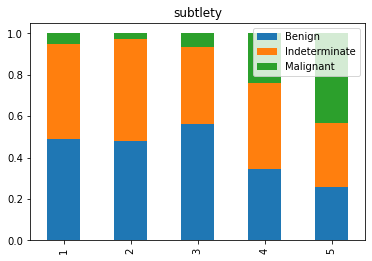

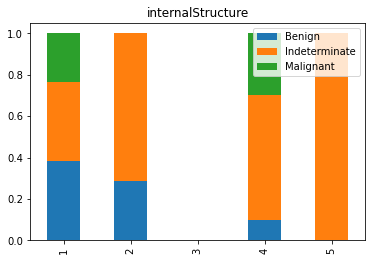

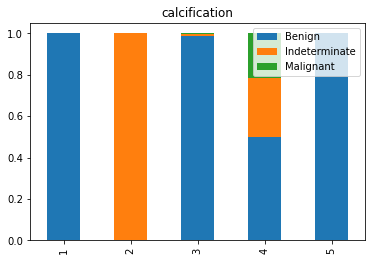

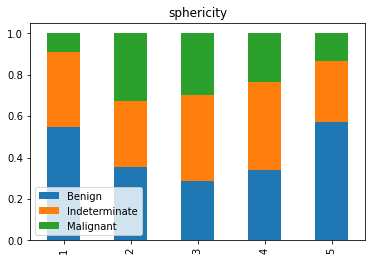

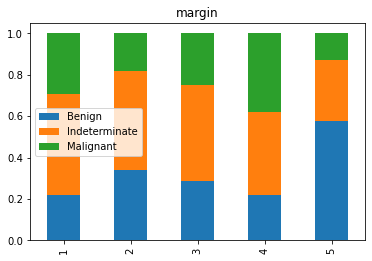

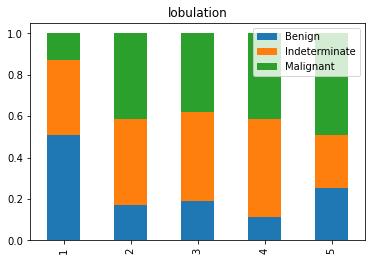

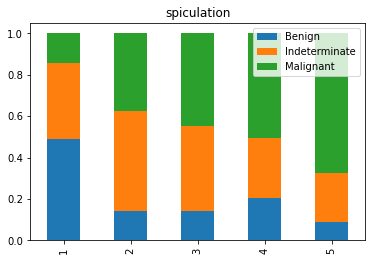

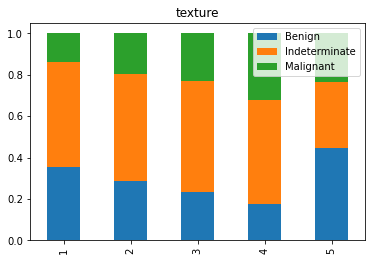

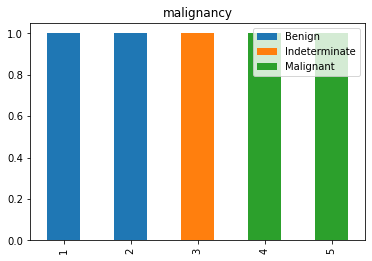

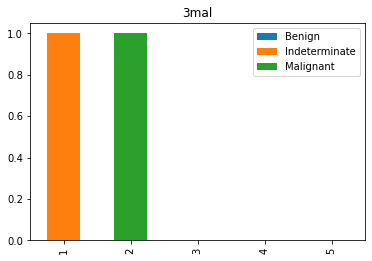

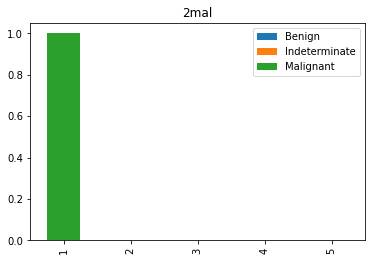

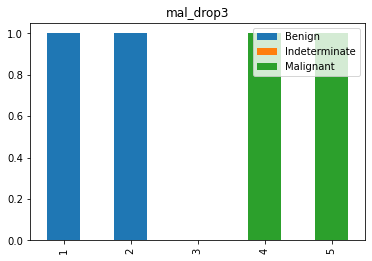

In [121]:
for i in range(len(counts)):
    pd.DataFrame(counts[i], index=[1,2,3,4,5], columns=["Benign", "Indeterminate", "Malignant"]).plot.bar(stacked=True, title=features.columns[i])

In [126]:
matrix_features = ["spiculation", "lobulation"]

matrix = []
for f0 in range(5):
    matrix.append([])
    for f1 in range(5):
        data_rows = (features[matrix_features[0]] == f0 + 1).values & (features[matrix_features[1]] == f1 + 1).values
        # mode of malignancy
        # matrix[f0].append(statistics.mode(features.loc[data_rows, "mal_drop3"].values) if data_rows.any() else 0)
        # count
        # matrix[f0].append(sum(data_rows))
        # mal/ben tuple
        matrix[f0].append((sum(features.loc[data_rows, "2mal"].values == 0) - sum(features.loc[data_rows, "2mal"].values == 1)))
matrix

[[662, -30, 23, -5, 1],
 [-9, -63, -19, -3, -4],
 [3, -21, -21, -8, -7],
 [8, -7, -15, -13, -7],
 [-24, -9, -13, -14, -5]]

In [ ]:
|